In [1]:
import cmath
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
from numpy.random import multivariate_normal

In [2]:
class complex_function:
    def __init__(self, grid_min, grid_max, grid_step, function):
        real_grid = np.arange(grid_min, grid_max, grid_step)
        complex_grid = np.arange(grid_min, grid_max, grid_step)
        xx, yy = np.meshgrid(real_grid, complex_grid, sparse=True)
        
        self.input_grid = np.vectorize(complex)(xx, yy).ravel()
        self.output = function(self.input_grid).ravel()
        self.function = function
        
    def plot(self):
        plt.figure(figsize=(20,20))

        for point in range(len(self.input_grid)):
            plt.plot( [self.input_grid.real[point], self.output.real[point]], 
                      [self.input_grid.imag[point], self.output.imag[point]], 
                      color = 'blue', 
                      linewidth=.2,)
        

        
        plt.scatter(self.input_grid.real, 
                    self.input_grid.imag, 
                    color = 'blue',
                    label = 'Input Grid')
        
        plt.scatter(self.output.real, 
                    self.output.imag, 
                    color = 'red',
                    label = 'Output Grid')

        plt.legend(prop={'size': 20})
        
        
        
    def generate_sample(self, var_scale, plot = False):
        #this is a complex normal distribution for noise
        real_noise, imag_noise = zip(*multivariate_normal(mean = (0, 0), 
                                                          cov = var_scale*np.identity(2), 
                                                          size = len(self.input_grid)))
        
        complex_noise = np.vectorize(complex)(np.array(real_noise), 
                                              np.array(imag_noise))
               
        with_noise = self.output + complex_noise
        
        if plot:
        
            self.plot()
            plt.scatter(with_noise.real, 
                        with_noise.imag, 
                        color = 'green',
                        label = 'Generated Sample')
            
            plt.legend(prop={'size': 20})
            
        return with_noise

In [3]:
def f(w):
    return complex(1,1)*w+complex(-1,2)

In [4]:
test = complex_function(grid_min = -2, 
                        grid_max =  2,
                        grid_step= .1, 
                        function =  f)

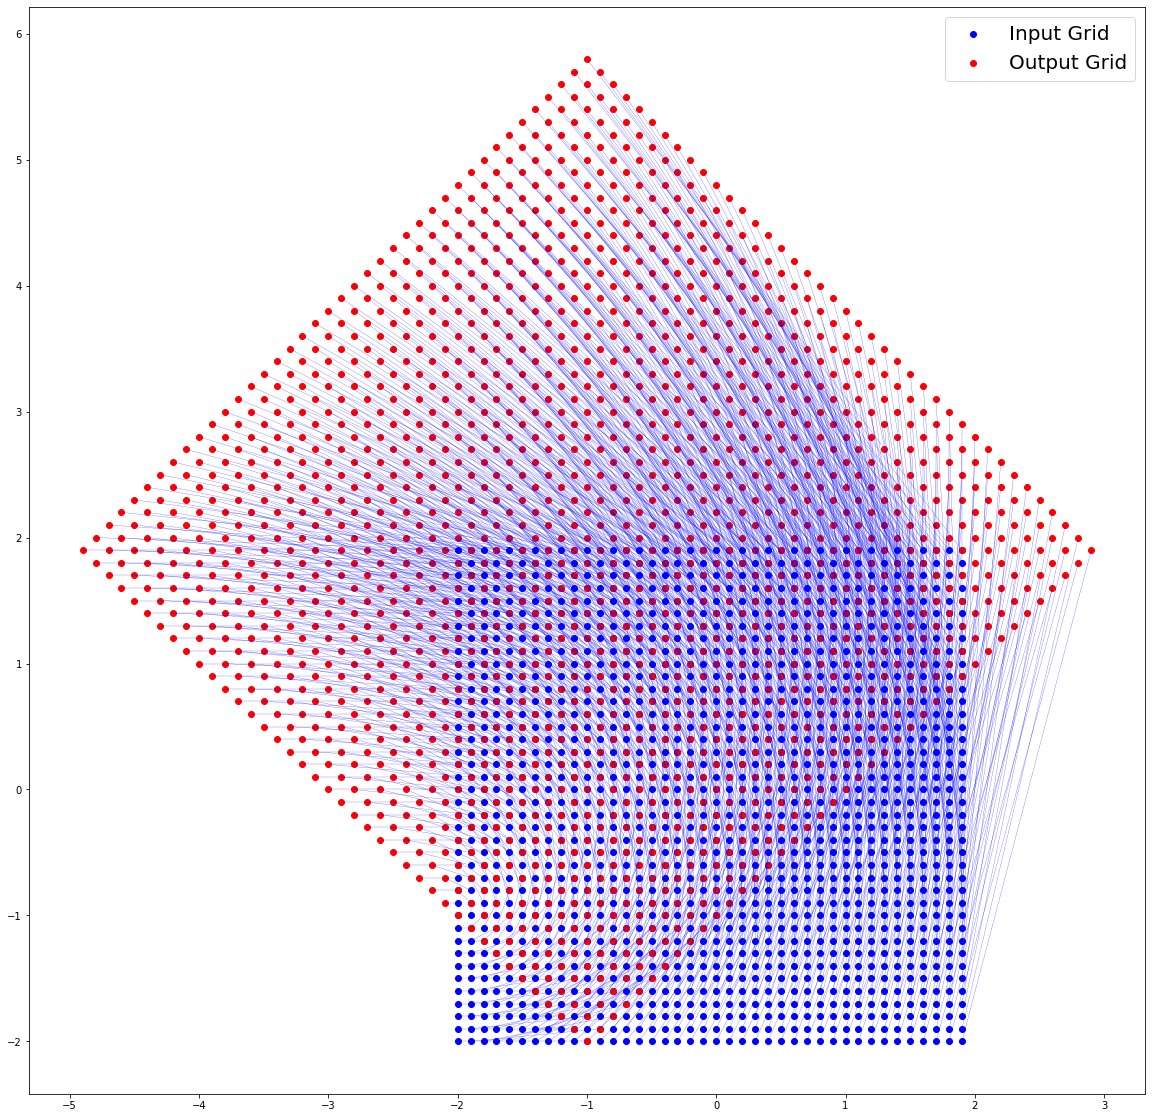

In [5]:
test.plot()

array([-0.52905923-2.40360432j, -0.55602581-2.0670504j ,
       -0.84597175-1.77661552j, ..., -1.47125645+5.31220109j,
       -1.32533468+5.79097368j, -1.10321432+6.03948307j])

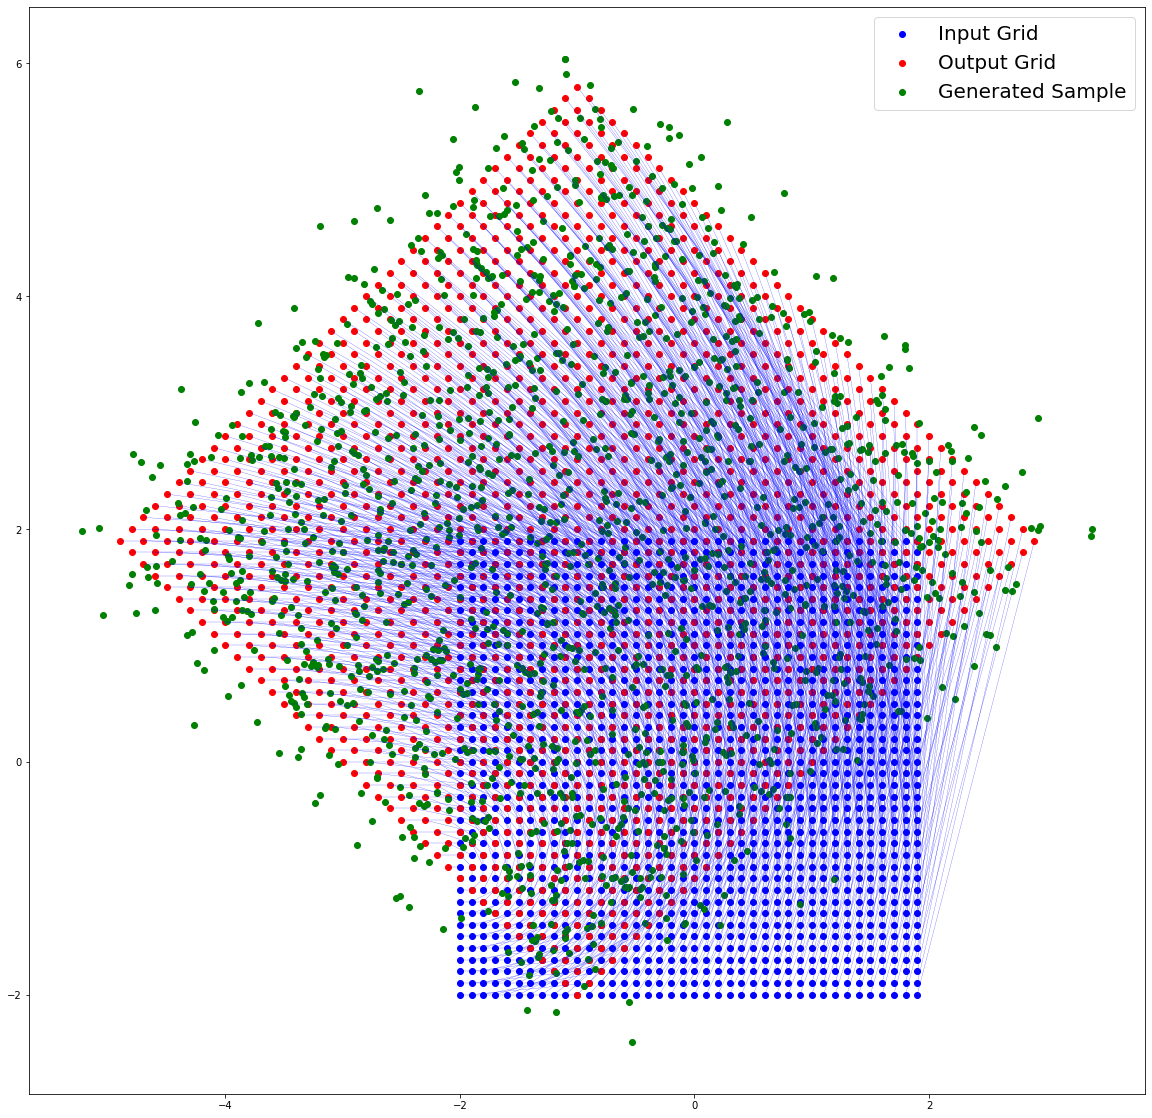

In [6]:
test.generate_sample(var_scale= .1, plot = True)

In [7]:
class complex_linear_regression:
    def fit(self, W, Z):
        W = W.ravel()
        Z = Z.ravel()
        
        X = self.design(W)
        X_star = X.conj().T
        Z = Z.reshape(-1, 1)
        
        self.beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_star, X)), X_star), Z)
        
    def predict(self, W, plot = False):
        W = W.ravel()
        X = self.design(W)
        pred = np.matmul(self.beta.T, X.T).ravel()   

        return pred
    
    def residual(self, W, Z, plot = False):
        pred = self.predict(W)

        if plot:
            plt.figure(figsize=(20,20))
            plt.scatter(pred.real, pred.imag, color = 'black', label='Predictions')
            plt.scatter(Z.real, Z.imag, color = 'green', label = 'Actual Values')
            plt.legend(prop={'size': 20})
            
        polar = np.vectorize(cmath.polar)(Z - pred)
        polar = polar[0]
        return np.sum(polar)/len(W)

    def design(self, W):
        W = W.ravel()
        return np.c_[np.ones(len(W)), W.reshape(-1, 1)]

In [8]:
Z = test.generate_sample(var_scale = .1, plot = False)
W = test.input_grid

In [9]:
reg = complex_linear_regression()
reg.fit(W, Z)

In [10]:
reg.beta

array([[-1.00238078+1.99886403j],
       [ 1.005808  +0.99844779j]])

In [15]:
predictions = reg.predict(W, plot = False)
values = {'Actual':Z, 'Predicted':predictions}
residual = pd.DataFrame(values)
residual.head()

,Actual,Predicted
0,-1.053729-2.422303j,-1.017101-2.009648j
1,-1.305798-1.851860j,-0.916520-1.909803j
2,-0.098174-1.925957j,-0.815940-1.809958j
3,-1.118294-2.426136j,-0.715359-1.710113j
4,-0.137445-1.349590j,-0.614778-1.610268j


0.3859439702131769

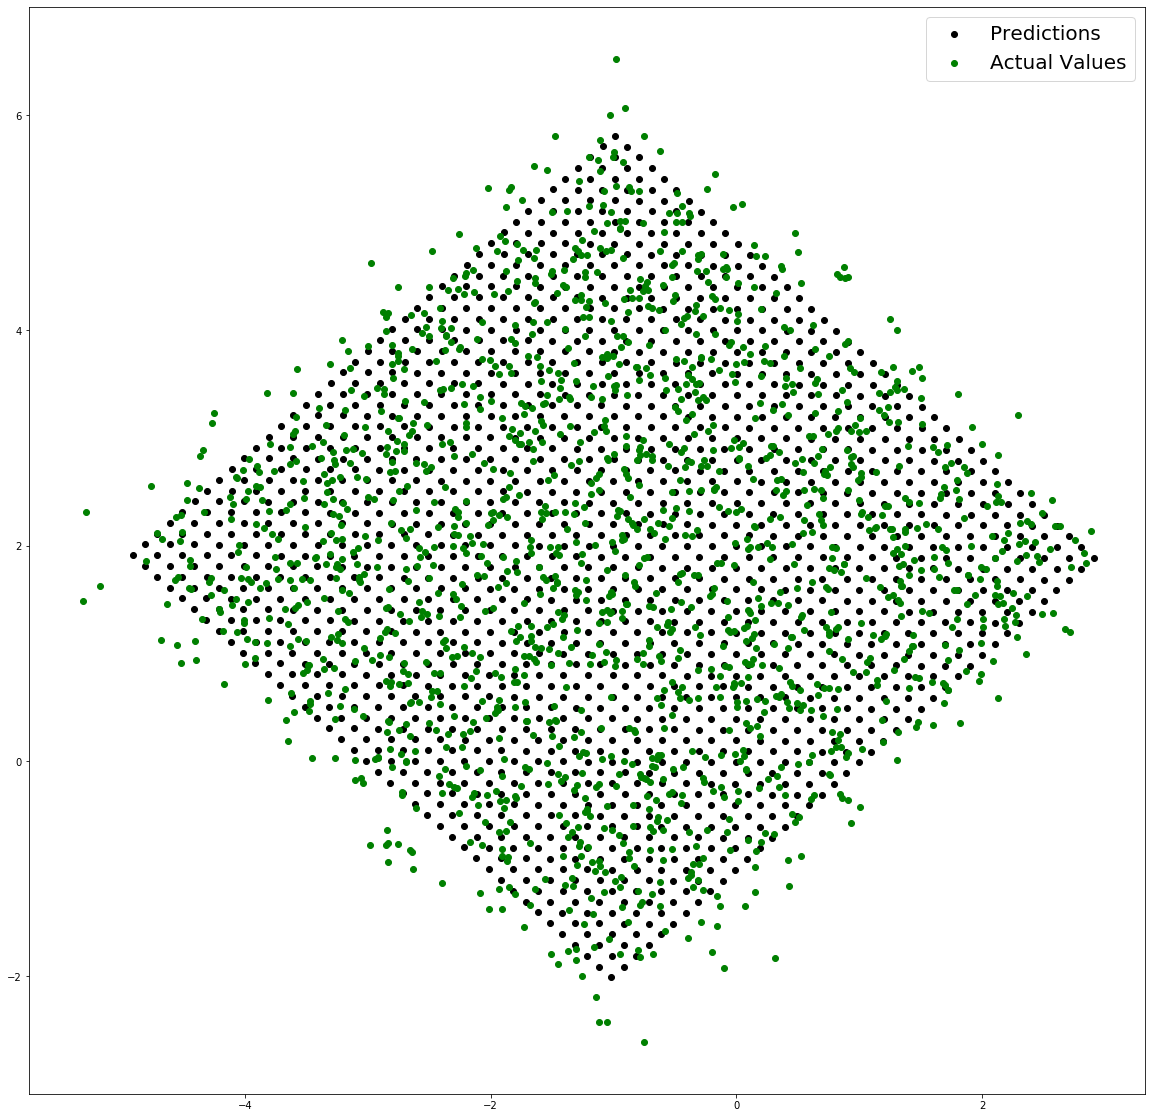

In [12]:
reg.residual(W, Z, plot = True)